In [2]:
# thanks to https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_train.columns

NameError: name 'pd' is not defined

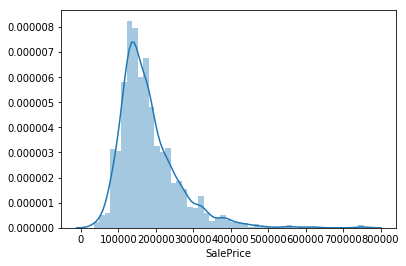

In [4]:
# histogram for sale price
sns.distplot(df_train['SalePrice']);

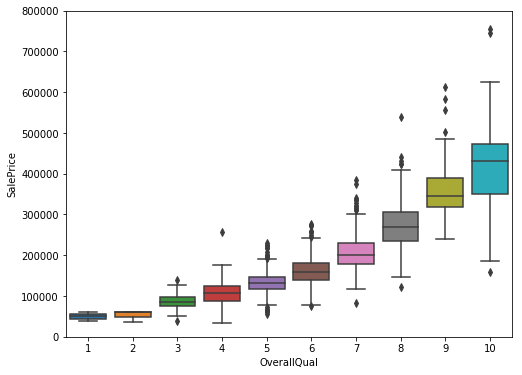

In [5]:
# box plot overall quality vs price
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
# overall quality is somehow subjective varible but it seems like linearly correlated with price

In [9]:
# correlation between features
corrmat = df_train.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);
corrmat.shape
# IF 2 features are too much correlated, we can discard one of the features

(38, 38)

In [ ]:
# saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()